# Kmeans

聚类是一种无监督的学习，它将相似的对象归到同一个簇中。聚类 方法几乎可以应用于所有对象，簇内的对象越相似，聚类的效果越好。本章要学习一种称为K均值（K-means）聚类的算法。之所以称之为K-均值是因为它可以发现k个不同的簇，且每个簇的 中心采用簇中所含值的均值计算而成。下面会逐步介绍该算法的更多细节。

聚类分析试图将相似对象归入同一簇，将不相似对象归到不同簇。相似这一概念取决于所选 择的相似度计算方法。前面章节已经介绍了不同的相似度计算方法，后续章节它们会继续出现。 到底使用哪种相似度计算方法取决于具体应用。

### K-均值聚类算法

K-均值是发现给定数据集的k个簇的算法。 簇个数k是用户给定的， 每一个簇通过其质心 （centroid），即簇中所有点的中心来描述。

K-均值算法的工作流程是这样的。首先，随机确定k个初始点作为质心。然后将数据集中的 每个点分配到一个簇中，具体来讲，为每个点找距其最近的质心，并将其分配给该质心所对应的簇。这一步完成之后，每个簇的质心更新为该簇所有点的平均值。

    创建k个点作为起始质心（经常是随机选择） 
    当任意一个点的簇分配结果发生改变时
        对数据集中的每个数据点 
            对每个质心 
                计算质心与数据点之间的距离 
            将数据点分配到距其最近的簇 
        对每一个簇，计算簇中所有点的均值并将均值作为质心
        
上面提到“最近”质心的说法， 意味着需要进行某种距离计算。 读者可以使用所喜欢的任意距离度量方法。 数据集上K-均值算法的性能会受到所选距离计算方法的影响。

In [1]:
import kMeans
from numpy import *
datMat=mat(kMeans.loadDataSet('testSet.txt'))
print('min [:0]', min(datMat[:,0]), 'max [:0]', max(datMat[:,0])) 
kMeans.randCent(datMat, 2)

min [:0] [[-5.379713]] max [:0] [[4.838138]]


matrix([[-5.2619322 ,  1.41672434],
        [-2.39692627, -2.10594946]])

In [2]:
#测试两个点之间的距离
kMeans.distEclud(datMat[0], datMat[1])

5.184632816681332

In [3]:
myCentroids, clustAssing = kMeans.kMeans(datMat, 4)

[[ 2.68532898  0.66657266]
 [-5.1114531  -0.29396855]
 [ 0.7202596  -3.86916336]
 [-1.57054957  3.25399117]]
[[ 3.04878282  1.954238  ]
 [-3.72724165 -2.27844576]
 [ 1.32320895 -3.28729825]
 [-1.8315881   3.1347811 ]]
[[ 2.80642645  2.73635527]
 [-3.53973889 -2.89384326]
 [ 2.44502437 -2.980011  ]
 [-2.46154315  2.78737555]]
[[ 2.6265299   3.10868015]
 [-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]
 [-2.46154315  2.78737555]]


In [4]:
myCentroids

matrix([[ 2.6265299 ,  3.10868015],
        [-3.53973889, -2.89384326],
        [ 2.65077367, -2.79019029],
        [-2.46154315,  2.78737555]])

In [5]:
clustAssing[:10] #前10个样本的簇头， 以及距离簇头的距离

matrix([[0.        , 2.3201915 ],
        [3.        , 1.39004893],
        [2.        , 7.46974076],
        [1.        , 3.60477283],
        [0.        , 2.7696782 ],
        [3.        , 2.80101213],
        [2.        , 5.10287596],
        [1.        , 1.37029303],
        [0.        , 2.29348924],
        [3.        , 0.64596748]])

In [6]:
import matplotlib
import matplotlib.pyplot as plt
def showPlt(datMat, alg=kMeans.kMeans, numClust=4):
    myCentroids, clustAssing = alg(datMat, numClust)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

[[ 0.99325938  4.69563629]
 [-2.1559846  -3.51341758]
 [-5.34943505  0.48251555]
 [-2.08271946  5.17814228]]
[[ 2.50635342  2.7386895 ]
 [-0.43783659 -2.95722708]
 [-3.764499    1.0539434 ]
 [-2.38707786  3.05451664]]
[[ 2.87916148  2.54065409]
 [-0.20930006 -3.01984921]
 [-3.97262943 -0.86949086]
 [-2.34085076  3.03826541]]
[[ 2.87916148  2.54065409]
 [ 1.648767   -3.12803795]
 [-3.68129565 -2.55085547]
 [-2.45009747  2.89275747]]
[[ 2.6265299   3.10868015]
 [ 2.65077367 -2.79019029]
 [-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]]


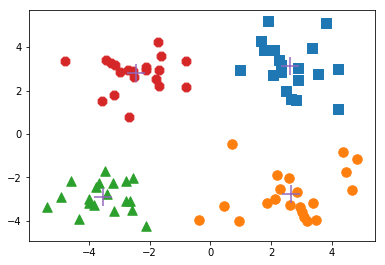

In [7]:
showPlt(datMat)

### 使用后处理来提高聚类性能

前面提到，在K-均值聚类中簇的数目k是一个用户预先定义的参数，那么用户如何才能知道k的选择是否正确？如何才能知道生成的簇比较好呢？在包含簇分配结果的矩阵中保存着每个点的误差，即该点到簇质心的距离平方值。下面会讨论利用该误差来评价聚类质量的方法。

考虑下图的聚类结果，这是在一个包含三个簇的数据集上运行K-均值算法之后的结果， 但是点的簇分配结果值没有那么准确。K-均值算法收敛但聚类效果较差的原因是，K-均值算法收 敛到了局部最小值，而非全局最小值（局部最小值指结果还可以但并非最好结果，全局最小值是 可能的最好结果）。

一种用于度量聚类效果的指标是SSE（Sum of Squared Error，误差平方和），对应程序清单10-2 中clusterAssment矩阵的第一列之和。SSE值越小表示数据点越接近于它们的质心，聚类效果也 越好。因为对误差取了平方，因此更加重视那些远离中心的点。一种肯定可以降低SSE值的方法是 增加簇的个数，但这违背了聚类的目标。聚类的目标是在保持簇数目不变的情况下提高簇的质量。

那么如何对图10-2的结果进行改进？你可以对生成的簇进行后处理，一种方法是将具有最大 SSE值的簇划分成两个簇。具体实现时可以将最大簇包含的点过滤出来并在这些点上运行K-均值算法，其中的k设为2。

[[-5.04125097  3.23350796]
 [-1.7517033  -0.35791272]
 [-4.90571312  4.96415035]]
[[-2.92813354  2.88218515]
 [ 0.47747729 -0.5661417 ]
 [-1.736822    4.241041  ]]
[[-2.65218135  2.62294929]
 [ 0.44545375 -1.61685212]
 [ 1.23949373  3.98456982]]
[[-2.46154315  2.78737555]
 [-0.2897198  -2.83942545]
 [ 2.6265299   3.10868015]]
[[-2.46154315  2.78737555]
 [-0.54735726 -2.93692713]
 [ 2.80642645  2.73635527]]
[[-2.46154315  2.78737555]
 [-0.68321373 -2.968607  ]
 [ 2.87916148  2.54065409]]


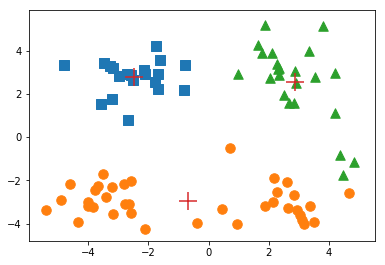

In [8]:
showPlt(datMat, numClust=3)

## 二分 K-均值算法
为克服K-均值算法收敛于局部最小值的问题，有人提出了另一个称为二分K-均值（bisecting K-means）的算法。该算法首先将所有点作为一个簇，然后将该簇一分为二。之后选择其中一个 簇继续进行划分，选择哪一个簇进行划分取决于对其划分是否可以最大程度降低SSE的值。上述 基于SSE的划分过程不断重复，直到得到用户指定的簇数目为止。

二分K-均值算法的伪代码形式如下：
    
    将所有点看成一个簇 
    当簇数目小于k时
        对于每一个簇 
            计算总误差 
            在给定的簇上面进行K-均值聚类（k=2） 
            计算将该簇一分为二之后的总误差 
        选择使得误差最大的那个簇进行划分操作
        

[-0.15772275000000002, 1.2253301166666664]
[[-0.35014771  2.3290074 ]
 [ 3.99078215 -0.6023558 ]]
[[-1.11855865  2.15235842]
 [ 1.76394905 -0.6287265 ]]
[[-1.53146664  3.41615979]
 [ 1.04430316 -0.69164584]]
[[-1.3277349   3.46607079]
 [ 0.93680474 -0.87084665]]
[[-0.84735206  3.46862312]
 [ 0.63042504 -1.33843332]]
[[-0.26853357  3.36606168]
 [ 0.02053813 -2.21845543]]
[[-0.06953469  3.29844341]
 [-0.32150057 -2.62473743]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]
sseSplit, and notSplit:  453.0334895807502 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[3.57893151 3.76342705]
 [2.59084922 0.6252119 ]]
[[ 1.77755255  3.66632025]
 [-1.79106465  2.7878857 ]]
[[ 2.93386365  3.12782785]
 [-2.94737575  3.3263781 ]]
sseSplit, and notSplit:  77.59224931775066 29.15724944412535
[[ 0.27034149 -1.76778916]
 [-1.8560898  -2.36243924]]
[[ 0.09107208 -2.84741783]
 [-1.2857485  -2.67441225]]
[[ 0.19848727 -3.24320436]
 [-1.26405367 -2.209896  ]]
[[ 0.2642961 -3.3057243]

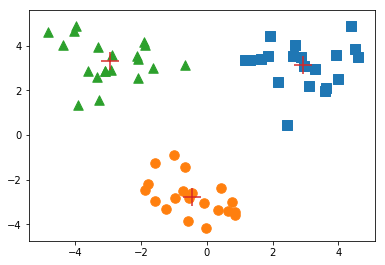

In [10]:
datMat3=mat(kMeans.loadDataSet('testSet2.txt'))
showPlt(datMat3, numClust=3,alg=kMeans.biKmeans)

In [3]:
kMeans.clusterClubs()

NameError: name 'mat' is not defined

### 本章小结

聚类是一种无监督的学习方法。所谓无监督学习是指事先并不知道要寻找的内容，即没有目 标变量。聚类将数据点归到多个簇中，其中相似数据点处于同一簇，而不相似数据点处于不同簇 中。聚类中可以使用多种不同的方法来计算相似度。

一种广泛使用的聚类算法是K-均值算法，其中k是用户指定的要创建的簇的数目。K-均值聚 类算法以k个随机质心开始。算法会计算每个点到质心的距离。每个点会被分配到距其最近的簇质心，然后紧接着基于新分配到簇的点更新簇质心。以上过程重复数次，直到簇质心不再改变。 这个简单的算法非常有效但是也容易受到初始簇质心的影响。为了获得更好的聚类效果，可以使 用另一种称为二分K-均值的聚类算法。二分K-均值算法首先将所有点作为一个簇，然后使用K均值算法（k = 2）对其划分。下一次迭代时，**选择有最大误差的簇进行划分**。该过程重复直到k 个簇创建成功为止。二分K-均值的聚类效果要好于K-均值算法。 K-均值算法以及变形的K-均值算法并非仅有的聚类算法，另外称为层次聚类的方法也被广泛 使用。下一章将介绍在数据集中查找关联规则的Apriori算法。


## 没有看后面的地图练习
